# No hidden layer

The output can only be a straight line

SimpleAnn(
  (outputL): Linear(in_features=1, out_features=1, bias=True)
)
Initial Weight and Bias****
outputL.weight tensor([[-0.6775]])
outputL.bias tensor([0.4220])
Epoch 0: Loss = 3.5437939167022705

Gradients before step:
outputL.weight.grad: tensor([[-6.4613]])
outputL.bias.grad: tensor([0.8440])

Updated Weights and Bias:
outputL.weight: tensor([[-0.0314]])
outputL.bias: tensor([0.3376])
Epoch 1: Loss = 0.6797012090682983

Gradients before step:
outputL.weight.grad: tensor([[-2.2057]])
outputL.bias.grad: tensor([0.6752])

Updated Weights and Bias:
outputL.weight: tensor([[0.1892]])
outputL.bias: tensor([0.2701])
<class 'numpy.ndarray'>
(2000, 1) <class 'numpy.ndarray'>


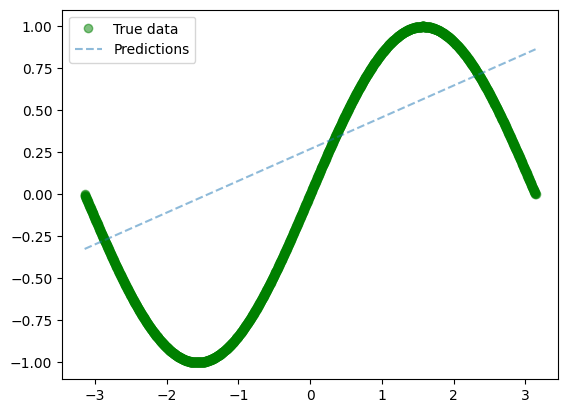

In [50]:
import torch
import math

# Generate synthetic data: sine wave
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float32, device="cpu")
y = torch.sin(x)

# Reshape data for neural network input
x_train = x.reshape(-1, 1) # Convert to column vectors
y_train = y.reshape(-1, 1)

hidden_nodes = 5

# Define the simple ANN model
class SimpleAnn(torch.nn.Module):
    def __init__(self, hidden_nodes=5):
        super(SimpleAnn, self).__init__()
        self.outputL = torch.nn.Linear(1, 1)

    def forward(self, x):
        # Forward pass through the network
        l1 = self.outputL(x)
        return l1

# Instantiate the model
model = SimpleAnn()
print(model)

print("Initial Weight and Bias****")
# Print initial weights and biases
for name, param in model.named_parameters():
  if param.requires_grad:
        print(name, param.data)

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Learning rate corrected to 0.1
epochs = 2  # For demonstration, use more epochs for actual training

for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass: Compute predicted y by passing x to the model
    output = model(x_train)

    # Compute and print loss
    loss = criterion(output, y_train)
    print(f"Epoch {epoch}: Loss = {loss.item()}")

    # Backward pass: Compute gradient of the loss with respect to model parameters
    loss.backward()

    # Before updating model parameters, print gradients for educational purposes
    print("\nGradients before step:")
    for name, param in model.named_parameters():
        print(f"{name}.grad: {param.grad}")



    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

    # After updating model parameters, you could print them to show the update
    print("\nUpdated Weights and Bias:")
    for name, param in model.named_parameters():
        print(f"{name}: {param.data}")

import matplotlib.pyplot as plt
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

The initialization of weights and biases in PyTorch layers, such as those in the torch.nn.Linear module, occurs at the moment of layer instantiation within the __init__ method of your model class. When you create an instance of a layer by calling its constructor (e.g., nn.Linear(1, hidden_nodes)), PyTorch automatically allocates memory for the weights and biases and initializes them according to the default initialization strategy defined for that layer type.

For torch.nn.Linear layers, PyTorch by default initializes weights using a uniform distribution and biases to zero, although the specific initialization strategy can vary between different versions of PyTorch or can be customized if needed.

# With 1 hidden layer with 4 nodes

4 linearly transformed outputs corresponding to the 4 nodes

In [53]:
import torch
import math

# Generate synthetic data: sine wave
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float32, device="cpu")
y = torch.sin(x)

# Reshape data for neural network input
x_train = x.reshape(-1, 1) # Convert to column vectors
y_train = y.reshape(-1, 1)

hidden_nodes = 5

# Define the simple ANN model
class SimpleAnn(torch.nn.Module):
    def __init__(self, hidden_nodes=5):
        super(SimpleAnn, self).__init__()
        self.hiddenL = torch.nn.Linear(1, hidden_nodes)
        self.outputL = torch.nn.Linear(hidden_nodes, 1)

    def forward(self, x):
        # Forward pass through the network
        l1 = self.hiddenL(x)
        print("\n***Net Input of Hidden Layer****\n",l1)
        print("Size : ",l1.shape)
        h1 = torch.relu(l1) # Check with sigmoid activation
        print("\n***Hidden Layer Output****\n",h1)
        print("Size : ",h1.shape)
        l2 = self.outputL(h1)
        print("\n\n***Predicted Value****\n",l2)
        print("Size : ",l2.shape)
        return l2

# Instantiate the model
model = SimpleAnn()
print(model)

print("Initial Weight and Bias****")
# Print initial weights and biases
for name, param in model.named_parameters():
  if param.requires_grad:
        print(name, param.data)

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Learning rate corrected to 0.1
epochs = 2  # For demonstration, use more epochs for actual training

for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass: Compute predicted y by passing x to the model
    output = model(x_train)

    # Compute and print loss
    loss = criterion(output, y_train)
    print(f"Epoch {epoch}: Loss = {loss.item()}")

    # Backward pass: Compute gradient of the loss with respect to model parameters
    loss.backward()

    # Before updating model parameters, print gradients for educational purposes
    print("\nGradients before step:")
    for name, param in model.named_parameters():
        print(f"{name}.grad: {param.grad}")



    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

    # After updating model parameters, you could print them to show the update
    print("\nUpdated Weights and Bias:")
    for name, param in model.named_parameters():
        print(f"{name}: {param.data}")


SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=5, bias=True)
  (outputL): Linear(in_features=5, out_features=1, bias=True)
)
Initial Weight and Bias****
hiddenL.weight tensor([[ 0.7788],
        [-0.8688],
        [-0.9519],
        [ 0.4885],
        [ 0.7626]])
hiddenL.bias tensor([-0.3574, -0.9106,  0.7188, -0.0376, -0.5939])
outputL.weight tensor([[-0.2169, -0.1795,  0.0908, -0.3005,  0.3775]])
outputL.bias tensor([0.2385])

***Net Input of Hidden Layer****
 tensor([[-2.8042,  1.8189,  3.7093, -1.5722, -2.9897],
        [-2.8018,  1.8162,  3.7063, -1.5706, -2.9873],
        [-2.7993,  1.8134,  3.7033, -1.5691, -2.9849],
        ...,
        [ 2.0844, -3.6346, -2.2657,  1.4939,  1.7971],
        [ 2.0869, -3.6373, -2.2687,  1.4954,  1.7995],
        [ 2.0893, -3.6400, -2.2717,  1.4970,  1.8019]],
       grad_fn=<AddmmBackward0>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.0000, 1.8189, 3.7093, 0.0000, 0.0000],
        [0.0000, 1.8162, 3.7063, 0.


***Net Input of Hidden Layer****
 tensor([[-2.7270,  1.9359,  3.6795, -1.4602, -3.1417],
        [-2.7246,  1.9330,  3.6766, -1.4588, -3.1391],
        [-2.7223,  1.9302,  3.6736, -1.4574, -3.1366],
        ...,
        [ 1.9690, -3.7148, -2.2442,  1.3254,  2.0205],
        [ 1.9713, -3.7176, -2.2472,  1.3268,  2.0231],
        [ 1.9737, -3.7205, -2.2502,  1.3282,  2.0257]],
       grad_fn=<AddmmBackward0>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.0000, 1.9359, 3.6795, 0.0000, 0.0000],
        [0.0000, 1.9330, 3.6766, 0.0000, 0.0000],
        [0.0000, 1.9302, 3.6736, 0.0000, 0.0000],
        ...,
        [1.9690, 0.0000, 0.0000, 1.3254, 2.0205],
        [1.9713, 0.0000, 0.0000, 1.3268, 2.0231],
        [1.9737, 0.0000, 0.0000, 1.3282, 2.0257]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.9619],
        [-0.9606],
        [-0.9594],
        ...,
        [ 0.5300],
        [ 0.5306],
        [ 0.5311]], grad_f

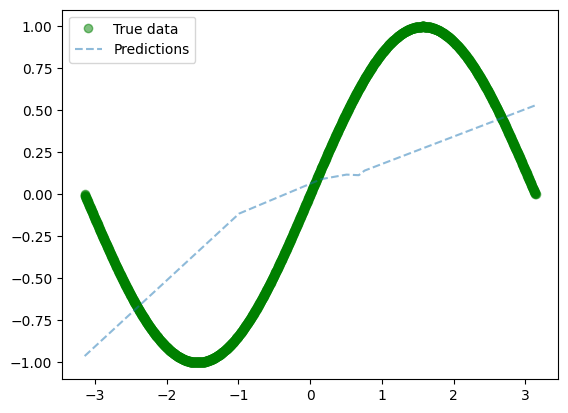

In [54]:
import matplotlib.pyplot as plt
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# With 2 hidden layers

In [47]:
import torch
import math

# Generate synthetic data: sine wave
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float32, device="cpu")
y = torch.sin(x)

# Reshape data for neural network input
x_train = x.reshape(-1, 1) # Convert to column vectors
y_train = y.reshape(-1, 1)

hidden_nodes_L1 = 4
hidden_nodes_L2 = 5
hidden_nodes_L3 = 4


# Define the simple ANN model
class SimpleAnn(torch.nn.Module):
    def __init__(self, hidden_nodes=5):
        super(SimpleAnn, self).__init__()

        self.hiddenL1 = torch.nn.Linear(1, hidden_nodes_L1)
        self.hiddenL2 = torch.nn.Linear(hidden_nodes_L1, hidden_nodes_L2)
        self.hiddenL3 = torch.nn.Linear(hidden_nodes_L2, hidden_nodes_L3)

        self.outputL = torch.nn.Linear(hidden_nodes_L3, 1)

# Show the effect of changingrelu to sigmoid and using Relu activation in last layer

    def forward(self, x):
        # Forward pass through the network
        l1 = self.hiddenL1(x) # Pass input to hidden layer
        h1 = torch.relu(l1) # Perform Relu acivation in hidden layer1
        l2 = self.hiddenL2(h1)
        h2 = torch.relu(l2)
        l3 = self.hiddenL3(h2)
        h3 = torch.relu(l3)

        l3 = self.outputL(h3)
        return l3

# Instantiate the model
model = SimpleAnn()
print(model)

# Loss function and optimizer
criterion = torch.nn.MSELoss()

#Show how it reduces slowly when lr=0.01
# How it oscillates when lr=0.2

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Learning rate corrected to 0.1
epochs = 100  # For demonstration, use more epochs for actual training

for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass: Compute predicted y by passing x to the model
    output = model(x_train)

    # Compute and print loss
    loss = criterion(output, y_train)
    print(f"Epoch {epoch}: Loss = {loss.item()}")

    # Backward pass: Compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()


SimpleAnn(
  (hiddenL1): Linear(in_features=1, out_features=4, bias=True)
  (hiddenL2): Linear(in_features=4, out_features=5, bias=True)
  (hiddenL3): Linear(in_features=5, out_features=4, bias=True)
  (outputL): Linear(in_features=4, out_features=1, bias=True)
)
Epoch 0: Loss = 0.49380823969841003
Epoch 1: Loss = 0.48951178789138794
Epoch 2: Loss = 0.485196590423584
Epoch 3: Loss = 0.48072904348373413
Epoch 4: Loss = 0.4759919345378876
Epoch 5: Loss = 0.47087621688842773
Epoch 6: Loss = 0.4652745723724365
Epoch 7: Loss = 0.45907431840896606
Epoch 8: Loss = 0.4521605372428894
Epoch 9: Loss = 0.4445754289627075
Epoch 10: Loss = 0.4362102448940277
Epoch 11: Loss = 0.4269826412200928
Epoch 12: Loss = 0.4167879819869995
Epoch 13: Loss = 0.40555787086486816
Epoch 14: Loss = 0.39326393604278564
Epoch 15: Loss = 0.3798811435699463
Epoch 16: Loss = 0.3654133677482605
Epoch 17: Loss = 0.3499077558517456
Epoch 18: Loss = 0.33350253105163574
Epoch 19: Loss = 0.3164779841899872
Epoch 20: Loss = 0.

<class 'numpy.ndarray'>
(2000, 1) <class 'numpy.ndarray'>


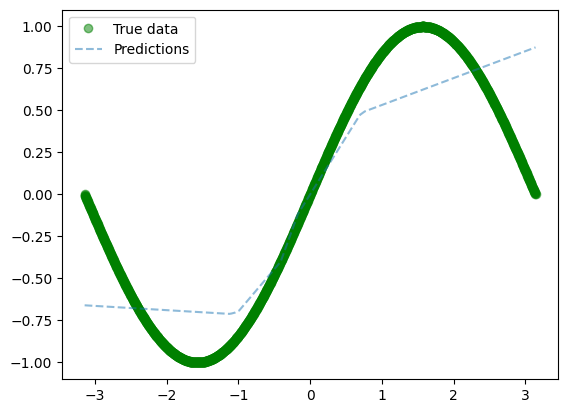

In [48]:
import matplotlib.pyplot as plt
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [1]:
import torch
import math

In [19]:
import torch
from torchviz import make_dot

model = SimpleAnn()  # Assuming SimpleANN is defined as in the previous PyTorch example
y = model(x_train)

dot = make_dot(y, params=dict(model.named_parameters()))
dot.render("model_visualization", format="png")  # This saves the visualization as a PNG file
print(dot)


***Net Input of Hidden Layer****
 tensor([[ 1.5497, -0.8014, -0.5478,  2.5921, -0.8795],
        [ 1.5472, -0.8007, -0.5471,  2.5891, -0.8785],
        [ 1.5447, -0.7999, -0.5464,  2.5861, -0.8775],
        ...,
        [-3.3788,  0.6805,  0.8053, -3.4083,  1.1215],
        [-3.3812,  0.6812,  0.8060, -3.4113,  1.1225],
        [-3.3837,  0.6819,  0.8066, -3.4143,  1.1235]],
       grad_fn=<AddmmBackward0>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[1.5497, 0.0000, 0.0000, 2.5921, 0.0000],
        [1.5472, 0.0000, 0.0000, 2.5891, 0.0000],
        [1.5447, 0.0000, 0.0000, 2.5861, 0.0000],
        ...,
        [0.0000, 0.6805, 0.8053, 0.0000, 1.1215],
        [0.0000, 0.6812, 0.8060, 0.0000, 1.1225],
        [0.0000, 0.6819, 0.8066, 0.0000, 1.1235]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.4200],
        [-0.4200],
        [-0.4200],
        ...,
        [-0.5335],
        [-0.5336],
        [-0.5337]], grad_f

In [11]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=078a9fbcabc1bb93ae2b63559c7dcb47483efe7e12b89a1b0123e8669ec88919
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


Create Synthetic dataset to simulate sin(x)

In [2]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype = torch.float32, device = "cpu")
y = torch.sin(x)
print(x,y)

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416]) tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08])


In [4]:
print(x.shape, y.shape) # They are row vectors

torch.Size([2000]) torch.Size([2000])


Convert to Column Vectors

In [3]:
x_train = x.reshape(-1,1)
y_train = torch.reshape(y,(-1,1))
print(x_train.shape, x.shape)
print(y_train.shape, y.shape)

torch.Size([2000, 1]) torch.Size([2000])
torch.Size([2000, 1]) torch.Size([2000])


In [5]:
hidden_nodes = 5
class SimpleAnn(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,hidden_nodes)
        self.outputL = torch.nn.Linear(hidden_nodes,1)

    def forward(self,x):
        l1 = self.hiddenL(x)
        print("\n***Net Input of Hidden Layer****\n",l1)
        print("Size : ",l1.shape)
        h1 = torch.relu(l1)
        print("\n***Hidden Layer Output****\n",h1)
        print("Size : ",h1.shape)
        l2 = self.outputL(h1)
        print("\n\n***Predicted Value****\n",l2)
        print("Size : ",l2.shape)
        return l2

model = SimpleAnn()
print(model)

SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=5, bias=True)
  (outputL): Linear(in_features=5, out_features=1, bias=True)
)


In [6]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-2)
epochs = 1

In [7]:
for epoch in range(epochs):
    optimizer.zero_grad()

    #Forward pass
    output = model(x_train)

    #Calculate the loss
    loss = criterion(y_train, output)
    print("Loss = ",loss)

    if epoch%50 == 0:
        print(f"Epoch : {epoch}, loss : {loss.item()}")

    print("\n*** Before backward Propogation***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)

    #Backpropagate
    loss.backward()

    print("\n*** After backward Propogation***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)

    #Update weights
    optimizer.step()

    print("\n*** After changing weigths***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)



***Net Input of Hidden Layer****
 tensor([[ 1.4662, -1.0588, -2.0055, -2.7084,  0.8309],
        [ 1.4638, -1.0583, -2.0031, -2.7053,  0.8305],
        [ 1.4614, -1.0579, -2.0007, -2.7021,  0.8300],
        ...,
        [-3.3305, -0.1781,  2.8041,  3.5317, -0.0653],
        [-3.3329, -0.1776,  2.8065,  3.5348, -0.0657],
        [-3.3353, -0.1772,  2.8090,  3.5379, -0.0662]],
       grad_fn=<AddmmBackward0>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[1.4662, 0.0000, 0.0000, 0.0000, 0.8309],
        [1.4638, 0.0000, 0.0000, 0.0000, 0.8305],
        [1.4614, 0.0000, 0.0000, 0.0000, 0.8300],
        ...,
        [0.0000, 0.0000, 2.8041, 3.5317, 0.0000],
        [0.0000, 0.0000, 2.8065, 3.5348, 0.0000],
        [0.0000, 0.0000, 2.8090, 3.5379, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[0.6322],
        [0.6314],
        [0.6305],
        ...,
        [2.1330],
        [2.1345],
        [2.1361]], grad_fn=<Add

In [ ]:
torch.save(model,"firstModel.pt")

In [ ]:
model = torch.load("firstModel.pt")
model.eval()
ypred = model(torch.Tensor(x_train[300]))
print(type(x_train[300]), ypred, torch.sin(x_train[300]))


***Net Input of Hidden Layer****
 tensor([ 0.3717,  0.4782, -1.2985,  0.7366,  1.5567], grad_fn=<AddBackward0>)
Size :  torch.Size([5])

***Hidden Layer Output****
 tensor([0.3717, 0.4782, 0.0000, 0.7366, 1.5567], grad_fn=<ReluBackward0>)
Size :  torch.Size([5])


***Predicted Value****
 tensor([-0.4955], grad_fn=<AddBackward0>)
Size :  torch.Size([1])
<class 'torch.Tensor'> tensor([-0.4955], grad_fn=<AddBackward0>) tensor([-0.8093])


In [ ]:
model = torch.load("firstModel.pt")
model.eval()
ypred = model(x_train)
print(x[300], ypred, torch.sin(x[300]))


***Net Input of Hidden Layer****
 tensor([[ 0.5781,  0.9124, -1.5995,  1.1129,  1.8565],
        [ 0.5774,  0.9110, -1.5985,  1.1117,  1.8555],
        [ 0.5767,  0.9095, -1.5975,  1.1104,  1.8545],
        ...,
        [-0.7956, -1.9782,  0.4042, -1.3919, -0.1395],
        [-0.7963, -1.9796,  0.4052, -1.3932, -0.1405],
        [-0.7970, -1.9811,  0.4062, -1.3945, -0.1415]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.5781, 0.9124, 0.0000, 1.1129, 1.8565],
        [0.5774, 0.9110, 0.0000, 1.1117, 1.8555],
        [0.5767, 0.9095, 0.0000, 1.1104, 1.8545],
        ...,
        [0.0000, 0.0000, 0.4042, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4052, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4062, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.6086],
        [-0.6082],
        [-0.6079],
        ...,
        [ 0.1973],
        [ 0.1977],
        [ 0.1980]], grad_fn


***Net Input of Hidden Layer****
 tensor([[ 0.5781,  0.9124, -1.5995,  1.1129,  1.8565],
        [ 0.5774,  0.9110, -1.5985,  1.1117,  1.8555],
        [ 0.5767,  0.9095, -1.5975,  1.1104,  1.8545],
        ...,
        [-0.7956, -1.9782,  0.4042, -1.3919, -0.1395],
        [-0.7963, -1.9796,  0.4052, -1.3932, -0.1405],
        [-0.7970, -1.9811,  0.4062, -1.3945, -0.1415]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.5781, 0.9124, 0.0000, 1.1129, 1.8565],
        [0.5774, 0.9110, 0.0000, 1.1117, 1.8555],
        [0.5767, 0.9095, 0.0000, 1.1104, 1.8545],
        ...,
        [0.0000, 0.0000, 0.4042, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4052, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4062, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-0.6086],
        [-0.6082],
        [-0.6079],
        ...,
        [ 0.1973],
        [ 0.1977],
        [ 0.1980]], grad_fn

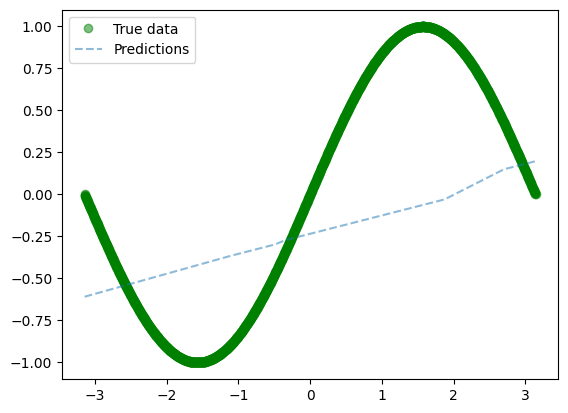

In [ ]:
import matplotlib.pyplot as plt
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
hidden_nodes = 10
class SimpleAnn(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,hidden_nodes)
        self.linear2 = torch.nn.Linear(hidden_nodes,hidden_nodes)
        self.linear3 = torch.nn.Linear(hidden_nodes,1)

    def forward(self,x):
        l1 = self.linear1(x)
        h1 = torch.relu(l1)
        l2 = self.linear2(h1)
        obj_relu = torch.nn.ReLU()
        h2 = obj_relu(l2)
        h3 = self.linear3(h2)
        return h3

model = SimpleAnn()
print(model)

SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=1, bias=True)
)
